In [2]:
N = 25
n1 = N%5
n2 = (N*N)%5 + 5
print(n1, n2)

0 5


In [3]:

from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np

In [4]:
df = pd.read_csv("../../datasets/students_simple.csv")
x, y = df.iloc[:, n1], df.iloc[:, n2]

In [5]:
x.head()

0    159
1    160
2    161
3    162
4    162
Name: height, dtype: int64

In [6]:
y.head()

0    20
1    25
2    28
3    19
4    23
Name: age, dtype: int64

# 1. Расчет корреляций  
    Фехнера  
    Пирсона + доверительный интервал  
    Спирмена  
    Кенделла  

In [7]:
xm, ym = x.mean(), y.mean()
x_sign, y_sign = np.sign(x - xm), np.sign(y - ym)
match = (x_sign == y_sign).sum()
mismatch = (x_sign != y_sign).sum()

In [8]:
fechner = (match - mismatch) / (match + mismatch)
print('Коэффициент корреляции Фехнера:', fechner)

Коэффициент корреляции Фехнера: 0.1


In [9]:
xc, yc = x - xm, y - ym
pearson = np.sum(xc * yc) / np.sqrt(np.sum(xc**2) * np.sum(yc**2))
print('Коэффициент корреляции Пирсона:', pearson)

Коэффициент корреляции Пирсона: 0.19437455140867985


In [10]:
import numpy as np
import scipy.stats as st

def pearson_confint(r, n, alpha: float = 0.05):

    z = np.arctanh(r)
    se = 1.0 / np.sqrt(n - 3.0)
    zcrit = st.norm.ppf(1.0 - alpha / 2.0)

    z_lo = z - zcrit * se
    z_hi = z + zcrit * se

    lo = np.tanh(z_lo)
    hi = np.tanh(z_hi)
    return lo, hi


In [11]:
lo, hi = pearson_confint(pearson, len(x))
lo, hi

(np.float64(-0.27149917188039824), np.float64(0.5864518109305056))

In [12]:
from scipy.stats import rankdata

xr = rankdata(x)
yr = rankdata(y)
xrm = xr.mean()
yrm = yr.mean()
xrmc = xr - xrm
yrmc = yr - yrm
spirmen = np.sum(xrmc * yrmc) / np.sqrt(np.sum(xrmc**2) * np.sum(yrmc**2))
print('Коэффициент корреляции Спирмена:', spirmen)

Коэффициент корреляции Спирмена: 0.1750230693403458


In [13]:
concordant = 0
discordant = 0
x_ties = 0
y_ties = 0
n = len(x)

for i in range(n):
    for j in range(i + 1, n):
        x_diff = xr[i] - xr[j]
        y_diff = yr[i] - yr[j]

        product = x_diff * y_diff

        if product > 0:
            concordant += 1
        elif product < 0:
            discordant += 1
        else:
            if x_diff == 0:
                x_ties += 1
            if y_diff == 0:
                y_ties += 1

total_pairs = n * (n - 1) // 2
numerator = concordant - discordant
denominator = np.sqrt((total_pairs - x_ties) * (total_pairs - y_ties))

kendall = numerator / denominator
print('Коэффициент корреляции Кенделла:', kendall)

Коэффициент корреляции Кенделла: 0.12229018009359617


# 2. Визуализация  
Гистограммы  
График рассеяния (scatter plot)

Text(0, 0.5, 'frequency')

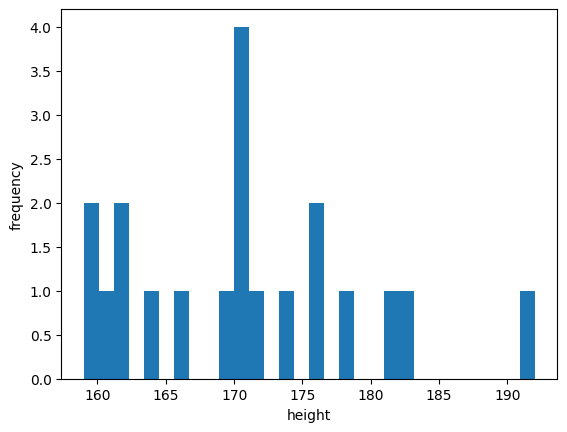

In [14]:
fig, hist_x = plt.subplots(1, 1)

hist_x.hist(x, bins=30)
hist_x.set_xlabel('height')
hist_x.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

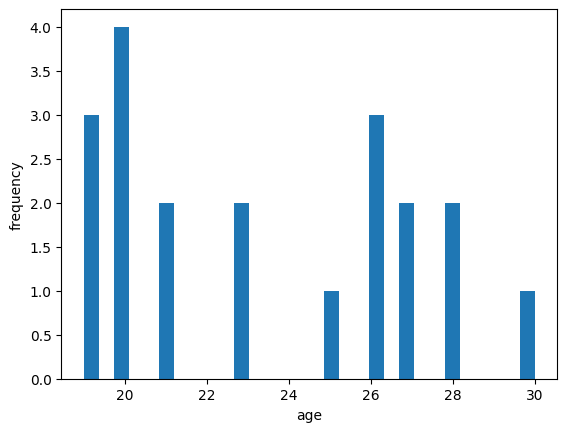

In [15]:
fig, hist_y = plt.subplots(1, 1)

hist_y.hist(y, bins=30)
hist_y.set_xlabel('age')
hist_y.set_ylabel('frequency')

Text(0, 0.5, 'age')

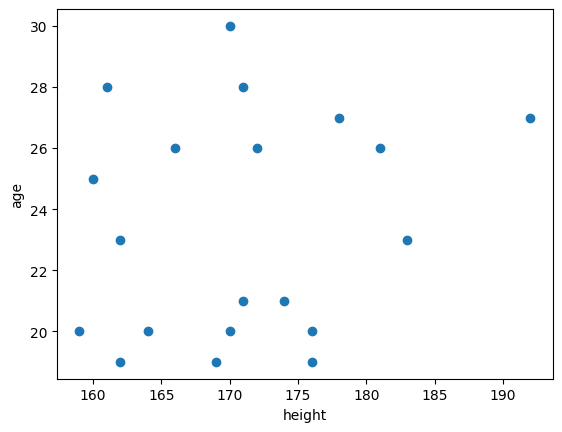

In [16]:
fig, scatter = plt.subplots(1, 1)

scatter.scatter(x, y)
scatter.set_xlabel('height')
scatter.set_ylabel('age')

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:

линейная, 
квадратичная, 
гиперболическая, 
показательная.  
Показать результаты на графиках

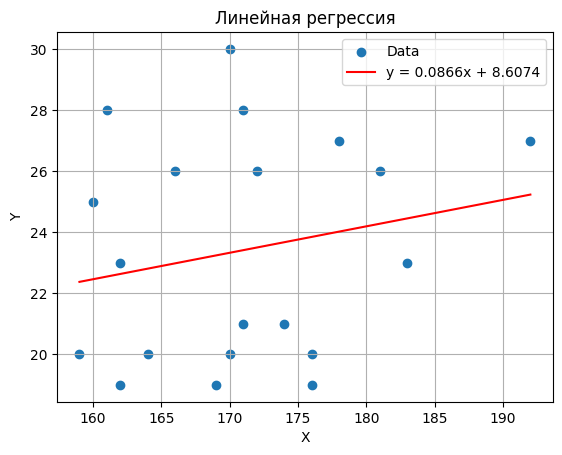

In [17]:
k = np.cov(x, y)[0, 1] / np.var(x)
b = np.mean(y) - k * np.mean(x)
plt.scatter(x, y, label='Data')

x_line = np.linspace(min(x), max(x), 100)
y_line = k * x_line + b

plt.plot(x_line, y_line, color='red', label=f'y = {k:.4f}x + {b:.4f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Линейная регрессия')
plt.show()

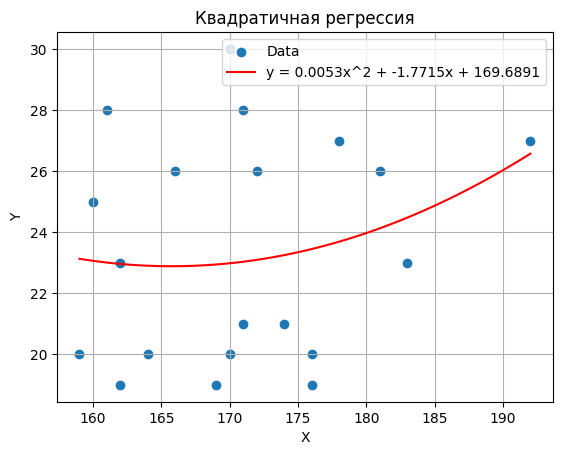

In [18]:
X = np.column_stack([np.ones(n), x, x**2])
beta = np.linalg.inv(X.T @ X) @ X.T @ y
plt.scatter(x, y, label='Data')

x_line = np.linspace(min(x), max(x), 100)
y_line = beta[2] * x_line**2 + beta[1] * x_line + beta[0]

plt.plot(x_line, y_line, color='red', label=f'y = {beta[2]:.4f}x^2 + {beta[1]:.4f}x + {beta[0]:.4f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Квадратичная регрессия')
plt.show()

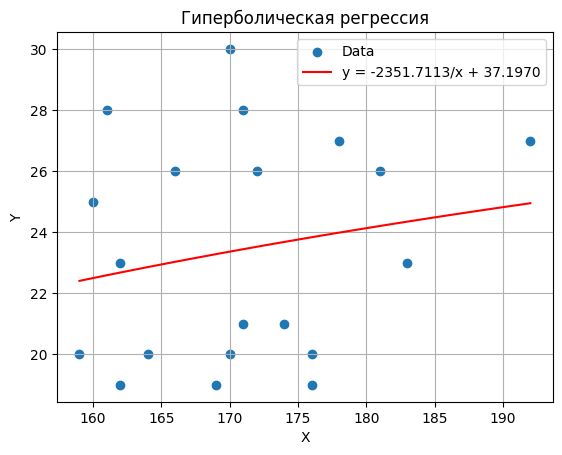

In [19]:
X = np.column_stack([np.ones(n), 1/x])
beta = np.linalg.inv(X.T @ X) @ X.T @ y
plt.scatter(x, y, label='Data')

x_line = np.linspace(min(x), max(x), 100)
y_line = (beta[1] / x_line) + beta[0]

plt.plot(x_line, y_line, color='red', label=f'y = {beta[1]:.4f}/x + {beta[0]:.4f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Гиперболическая регрессия')
plt.show()

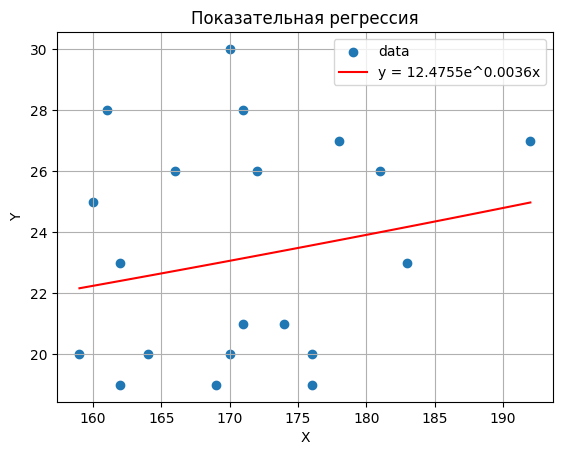

In [20]:
X = np.column_stack([np.ones(n), x])
beta = np.linalg.inv(X.T @ X) @ X.T @ np.log(y)
plt.scatter(x, y, label='data')

x_line = np.linspace(min(x), max(x), 100)
y_line = np.exp((beta[1] * x_line) + beta[0])

plt.plot(x_line, y_line, color='red', label=f'y = {np.exp(beta[0]):.4f}e^{beta[1]:.4f}x')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Показательная регрессия')
plt.show()

In [21]:
import numpy as np

def r2_score_vec(y_true, y_pred):
    y = np.asarray(y_true, float)
    yhat = np.asarray(y_pred, float)
    ymean = y.mean()
    rss = ((y - yhat) ** 2).sum()
    tss = ((y - ymean) ** 2).sum()
    return float(1.0 - rss / tss) if tss > 0 else float('nan')

k = np.cov(x, y)[0, 1] / np.var(x)
b = float(np.mean(y) - k * np.mean(x))
y_lin = k * x + b
r2_lin = r2_score_vec(y, y_lin)

X2 = np.column_stack([np.ones(len(x)), x, x**2])
beta2 = np.linalg.inv(X2.T @ X2) @ (X2.T @ y)
y_quad = beta2[0] + beta2[1] * x + beta2[2] * x**2
r2_quad = r2_score_vec(y, y_quad)

Xh = np.column_stack([np.ones(len(x)), 1.0 / np.asarray(x)])
beta_h = np.linalg.inv(Xh.T @ Xh) @ (Xh.T @ np.asarray(y))
y_hyp = beta_h[0] + beta_h[1] / np.asarray(x)
r2_hyp = r2_score_vec(y, y_hyp)

Xe = np.column_stack([np.ones(len(x)), np.asarray(x)])
beta_e = np.linalg.inv(Xe.T @ Xe) @ (Xe.T @ np.log(np.asarray(y)))
y_exp = np.exp(beta_e[0] + beta_e[1] * np.asarray(x))
r2_exp = r2_score_vec(y, y_exp)

print(f"R^2 (линейная):       {r2_lin:.4f}")
print(f"R^2 (квадратичная):   {r2_quad:.4f}")
print(f"R^2 (гиперболическая): {r2_hyp:.4f}")
print(f"R^2 (показательная):  {r2_exp:.4f}")


R^2 (линейная):       0.0377
R^2 (квадратичная):   0.0559
R^2 (гиперболическая): 0.0347
R^2 (показательная):  0.0336


### 4. Проверка уравнения регрессии  
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

In [22]:
from scipy.stats import f

alpha=0.05
k=1

n = len(y)
r2 = r2_exp
F = (r2 / k) / ((1 - r2) / (n - k - 1))
f_crit = f.ppf(1 - alpha, k, n - k - 1)   

print(f'for exp regression:')
print(f'F-statistic: {F:.4f}')
print(f'сritical F (alpha=0.05): {f_crit:.4f}')

for exp regression:
F-statistic: 0.6262
сritical F (alpha=0.05): 4.4139


In [23]:
n = len(y)
r2 = r2_quad
F = (r2 / k) / ((1 - r2) / (n - k - 1))
f_crit = f.ppf(1 - alpha, k, n - k - 1)

print(f'for quad regression:')
print(f'F-statistic: {F:.4f}')
print(f'сritical F (alpha=0.05): {f_crit:.4f}')


for quad regression:
F-statistic: 1.0657
сritical F (alpha=0.05): 4.4139
